# Exploration of the microbiota dataset

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import src.data.dataloader as dataloader

## NIPICOL Experiment: data extraction

We have at our disposal the results of a given experiments named "NIPICOL". The experiment was conducted over 83 patients, and consists in determining the patient's health state after the study given its microbiota composition.

For the sake of anonymization, each patient name is encrypted in an id formatted as "FRA..."with 11 characters, and sometimes a "bis" annotation that is yet to be determined.

In the NIPICOL dataframe, we get the microbiota composition of the individuals in the dataset. Each column is an individual, and each row represents the proportion of a given bacteria in its composition. The rows name match the taxonomy of the bacteria specimen for which the proportion is assessed.

In the mapping dataframe, we get various annotations about each patient. Specifically, we are interested in the `best_irecist` column indicates the response of the patient to the study and forms our main interest label. `CR` signifying a complete remission, we will consider the other labels to be negative results of the study so to binarize our labels.

Hence, our goal is to predict a complete remission given the microbiota composition of each individual.

In [2]:
df = dataloader.get_NIPICOL('src/data')
df

,ASV_ID,FRA022001CA,FRA022001CAbis,FRA022002BB,FRA022002BBbis,FRA022003GA,FRA022003GAbis,FRA022004MC,FRA022004MCbis,FRA022005KF,...,FRA189002AL,FRA189002ALbis,FRA189004JL,FRA189004JLbis,FRA189005JP,FRA189005JPbis,FRA189010CM,FRA189010CMbis,FRA256001DJ,FRA256001DJbis
0,d__Bacteria| p__Proteobacteria| c__Gammaproteo...,0.000000,0.000156,0.001466,0.000777,0.235584,0.005957,0.008341,0.004297,0.000000,...,0.000000,0.000000,0.0,0.000464,0.004395,0.007333,0.131358,0.000000,0.000000,0.000000
1,d__Bacteria| p__Bacteroidota| c__Bacteroidia| ...,0.095238,0.056882,0.043218,0.036251,0.003964,0.003916,0.109835,0.132469,0.183514,...,0.000000,0.000000,0.0,0.002896,0.003876,0.000000,0.000000,0.000000,0.034493,0.031611
2,d__Bacteria| p__Actinobacteriota| c__Actinobac...,0.023264,0.000000,0.000000,0.000000,0.000000,0.017871,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.001506,0.003676,0.000000,0.000000,0.002364,0.000000
3,d__Bacteria| p__Firmicutes| c__Clostridia| o__...,0.029662,0.044246,0.021242,0.011225,0.000000,0.026672,0.020878,0.013249,0.103148,...,0.088852,0.068275,0.0,0.006743,0.017777,0.010066,0.027645,0.059375,0.031137,0.029775
4,d__Bacteria| p__Bacteroidota| c__Bacteroidia| ...,0.000000,0.000000,0.281017,0.304874,0.005989,0.009739,0.000000,0.000000,0.000000,...,0.069991,0.076763,0.0,0.133824,0.009481,0.004451,0.015935,0.006307,0.004494,0.011135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,d__Bacteria| p__Firmicutes| c__Clostridia| o__...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1067,d__Bacteria| p__Firmicutes| c__Clostridia| o__...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,...,0.000230,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1068,d__Bacteria| p__Firmicutes| c__Clostridia| o__...,0.000000,0.000000,0.000000,0.000097,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000195,0.000000,0.000000
1069,d__Bacteria| p__Firmicutes| c__Clostridia| o__...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
mapping = dataloader.get_mapping_NIPICOL('src/data')
mapping

,id,numpat,Exp,timepoint,to_take,Subject_ID,irecistw12,irecistw12_tp,best_irecist,best_irecist_tp,best_irecist2,best_irecist2_tp,iPFS_progr,ipfs_time,os_time,os_event
0,FRA022001CA,FRA022-001,nipicol,S0,yes,1,SD,S0_SD,SD,S0_SD,SD,S0_SD,0,19.022587,19.055441,0
1,FRA022001CAbis,FRA022-001,nipicol,S12,yes,1,SD,S12_SD,SD,S12_SD,SD,S12_SD,0,19.022587,19.055441,0
2,FRA022002BB,FRA022-002,nipicol,S0,yes,2,SD,S0_SD,PR,S0_PR,PR_CR,S0_PR_CR,0,25.494867,25.494867,0
3,FRA022002BBbis,FRA022-002,nipicol,S12,yes,2,SD,S12_SD,PR,S12_PR,PR_CR,S12_PR_CR,0,25.494867,25.494867,0
4,FRA022003GA,FRA022-003,nipicol,S0,yes,3,SD,S0_SD,PR,S0_PR,PR_CR,S0_PR_CR,0,25.297741,25.297741,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,FRA189005JPbis,FRA189-005,nipicol,S12,yes,29,PR,S12_PR,PR,S12_PR,PR_CR,S12_PR_CR,0,13.963039,14.225873,0
79,FRA189010CM,FRA189-010,nipicol,S0,yes,52,SD,S0_SD,PR,S0_PR,PR_CR,S0_PR_CR,0,12.747433,12.747433,0
80,FRA189010CMbis,FRA189-010,nipicol,S12,yes,52,SD,S12_SD,PR,S12_PR,PR_CR,S12_PR_CR,0,12.747433,12.747433,0
81,FRA256001DJ,FRA256-001,nipicol,S0,yes,22,CR,S0_CR,CR,S0_CR,PR_CR,S0_PR_CR,0,10.973306,12.418891,0


From these raw data we will conceive our data matrix `X` and the labels `y`.

In [4]:
X = df.transpose()
X.columns = X.iloc[0].tolist()
X = X.drop(X.index[0])
X = X.astype(np.float64)
X

,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae| g__Escherichia-Shigella|7a5478452f84fc37376a3408bc310451,d__Bacteria| p__Bacteroidota| c__Bacteroidia| o__Bacteroidales| f__Bacteroidaceae| g__Bacteroides| s__Bacteroides_dorei|9b4f3f7e600916aa527ba3bd132a4ca6,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Bifidobacteriales| f__Bifidobacteriaceae| g__Bifidobacterium|ee860c7177c6aa5a6e337da1b1960a29,d__Bacteria| p__Firmicutes| c__Clostridia| o__Lachnospirales| f__Lachnospiraceae| g__Blautia|7f03b2c8f50e54d015ddf07fa90c95fd,d__Bacteria| p__Bacteroidota| c__Bacteroidia| o__Bacteroidales| f__Bacteroidaceae| g__Bacteroides| s__Bacteroides_vulgatus|159871098ca16ec6d19aea367ffee488,d__Bacteria| p__Bacteroidota| c__Bacteroidia| o__Bacteroidales| f__Bacteroidaceae| g__Bacteroides| s__Bacteroides_vulgatus|82a938698291b68cecfcb9d46457229b,d__Bacteria| p__Firmicutes| c__Bacilli| o__Lactobacillales| f__Streptococcaceae| g__Streptococcus|278f28a185593f1ddf4e891f1ef6d1ac,d__Bacteria| p__Firmicutes| c__Clostridia| o__Lachnospirales| f__Lachnospiraceae| g__Agathobacter| s__[Eubacterium]_rectale|fe8ead2946324fd23605a7e82c52261a,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__Ruminococcaceae| g__Faecalibacterium|689d03e9572c681bb9e11ce09f36e4bb,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__Ruminococcaceae| g__Faecalibacterium|b9072242edca7525f17dfaf07abbb08e,...,d__Bacteria| p__Firmicutes| c__Clostridia| o__Lachnospirales| f__Lachnospiraceae| g__Roseburia| s__gut_metagenome|ba4ec057ff6f175134171c197269f5f5,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__[Eubacterium]_coprostanoligenes_group| g__[Eubacterium]_coprostanoligenes_group| s__unidentified|423d5ccfa43c914c234173f5b7a94822,d__Bacteria| p__Actinobacteriota| c__Coriobacteriia| o__Coriobacteriales| f__Eggerthellaceae| g__Senegalimassilia| s__uncultured_bacterium|1ac643ef39d8ef2e8e4c4edbad3c1208,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__Oscillospiraceae| g__Papillibacter| s__uncultured_bacterium|b76c9718a8ad3db13fb3809460cd78cc,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__Ruminococcaceae| g__Paludicola| s__Ruminococcaceae_bacterium|4119354c81abbb0d8ee8c3f7c4d05dd5,d__Bacteria| p__Firmicutes| c__Clostridia| o__Christensenellales| f__Christensenellaceae| g__Christensenellaceae_R-7_group| s__uncultured_bacterium|36376a562c920d5d13a70317407947cd,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__Ruminococcaceae| g__Candidatus_Soleaferrea| s__uncultured_bacterium|17644a374bd5005fdc248efb8d9af68c,d__Bacteria| p__Firmicutes| c__Clostridia| o__Lachnospirales| f__Lachnospiraceae| g__Tyzzerella| s__unidentified|8fd0bd19ed36582fdecc6e6a3cfbe49e,d__Bacteria| p__Firmicutes| c__Clostridia| o__Lachnospirales| f__Lachnospiraceae| g__Anaerostipes|5d63e2e6e2a476d1515102dd96658eb6,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__Butyricicoccaceae| g__Butyricicoccus| s__Butyricicoccus_sp.|1b1776b1b0465b7f18481164a523e86a
FRA022001CA,0.000000,0.095238,0.023264,0.029662,0.000000,0.000000,0.001922,0.000000,0.000000,0.014802,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
FRA022001CAbis,0.000156,0.056882,0.000000,0.044246,0.000000,0.000000,0.000933,0.000000,0.007154,0.003616,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
FRA022002BB,0.001466,0.043218,0.000000,0.021242,0.281017,0.061320,0.005640,0.002876,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
FRA022002BBbis,0.000777,0.036251,0.000000,0.011225,0.304874,0.063511,0.000632,0.039409,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000097,0.0,0.000000
FRA022003GA,0.235584,0.003964,0.000000,0.000000,0.005989,0.003582,0.004052,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FRA189005JPbis,0.007

In [5]:
y = mapping['best_irecist'].apply(lambda x : (x == 'CR') * 1).astype(np.int32)
y.index = mapping.id
y

id
FRA022001CA       0
FRA022001CAbis    0
FRA022002BB       0
FRA022002BBbis    0
FRA022003GA       0
                 ..
FRA189005JPbis    0
FRA189010CM       0
FRA189010CMbis    0
FRA256001DJ       1
FRA256001DJbis    1
Name: best_irecist, Length: 83, dtype: int32

In [6]:
dataset = X.copy()
dataset['label'] = y
dataset

,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae| g__Escherichia-Shigella|7a5478452f84fc37376a3408bc310451,d__Bacteria| p__Bacteroidota| c__Bacteroidia| o__Bacteroidales| f__Bacteroidaceae| g__Bacteroides| s__Bacteroides_dorei|9b4f3f7e600916aa527ba3bd132a4ca6,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Bifidobacteriales| f__Bifidobacteriaceae| g__Bifidobacterium|ee860c7177c6aa5a6e337da1b1960a29,d__Bacteria| p__Firmicutes| c__Clostridia| o__Lachnospirales| f__Lachnospiraceae| g__Blautia|7f03b2c8f50e54d015ddf07fa90c95fd,d__Bacteria| p__Bacteroidota| c__Bacteroidia| o__Bacteroidales| f__Bacteroidaceae| g__Bacteroides| s__Bacteroides_vulgatus|159871098ca16ec6d19aea367ffee488,d__Bacteria| p__Bacteroidota| c__Bacteroidia| o__Bacteroidales| f__Bacteroidaceae| g__Bacteroides| s__Bacteroides_vulgatus|82a938698291b68cecfcb9d46457229b,d__Bacteria| p__Firmicutes| c__Bacilli| o__Lactobacillales| f__Streptococcaceae| g__Streptococcus|278f28a185593f1ddf4e891f1ef6d1ac,d__Bacteria| p__Firmicutes| c__Clostridia| o__Lachnospirales| f__Lachnospiraceae| g__Agathobacter| s__[Eubacterium]_rectale|fe8ead2946324fd23605a7e82c52261a,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__Ruminococcaceae| g__Faecalibacterium|689d03e9572c681bb9e11ce09f36e4bb,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__Ruminococcaceae| g__Faecalibacterium|b9072242edca7525f17dfaf07abbb08e,...,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__[Eubacterium]_coprostanoligenes_group| g__[Eubacterium]_coprostanoligenes_group| s__unidentified|423d5ccfa43c914c234173f5b7a94822,d__Bacteria| p__Actinobacteriota| c__Coriobacteriia| o__Coriobacteriales| f__Eggerthellaceae| g__Senegalimassilia| s__uncultured_bacterium|1ac643ef39d8ef2e8e4c4edbad3c1208,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__Oscillospiraceae| g__Papillibacter| s__uncultured_bacterium|b76c9718a8ad3db13fb3809460cd78cc,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__Ruminococcaceae| g__Paludicola| s__Ruminococcaceae_bacterium|4119354c81abbb0d8ee8c3f7c4d05dd5,d__Bacteria| p__Firmicutes| c__Clostridia| o__Christensenellales| f__Christensenellaceae| g__Christensenellaceae_R-7_group| s__uncultured_bacterium|36376a562c920d5d13a70317407947cd,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__Ruminococcaceae| g__Candidatus_Soleaferrea| s__uncultured_bacterium|17644a374bd5005fdc248efb8d9af68c,d__Bacteria| p__Firmicutes| c__Clostridia| o__Lachnospirales| f__Lachnospiraceae| g__Tyzzerella| s__unidentified|8fd0bd19ed36582fdecc6e6a3cfbe49e,d__Bacteria| p__Firmicutes| c__Clostridia| o__Lachnospirales| f__Lachnospiraceae| g__Anaerostipes|5d63e2e6e2a476d1515102dd96658eb6,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__Butyricicoccaceae| g__Butyricicoccus| s__Butyricicoccus_sp.|1b1776b1b0465b7f18481164a523e86a,label
FRA022001CA,0.000000,0.095238,0.023264,0.029662,0.000000,0.000000,0.001922,0.000000,0.000000,0.014802,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0
FRA022001CAbis,0.000156,0.056882,0.000000,0.044246,0.000000,0.000000,0.000933,0.000000,0.007154,0.003616,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0
FRA022002BB,0.001466,0.043218,0.000000,0.021242,0.281017,0.061320,0.005640,0.002876,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0
FRA022002BBbis,0.000777,0.036251,0.000000,0.011225,0.304874,0.063511,0.000632,0.039409,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000097,0.0,0.000000,0
FRA022003GA,0.235584,0.003964,0.000000,0.000000,0.005989,0.003582,0.004052,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FRA189005JPbis,0.007333,0.000000,0.003676,0.010066,0.004451,0.000000,0.033893,0.025840,0.059696,0.031436,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0
FRA189010

## Statistical analysis

In this section, we highlight some simple statistics on the NIPICOL dataset to get a better hang of the dynamic of our problem.

In [7]:
proportion_label_1 = y.sum() / len(y)
print(f"Proportion of label 1 individuals: {proportion_label_1}")

Proportion of label 1 individuals: 0.21686746987951808


Hence we will be working on an imbalanced dataset.

Now we conduct an analysis on the bacteria and their possible link with the labels.

<AxesSubplot: >

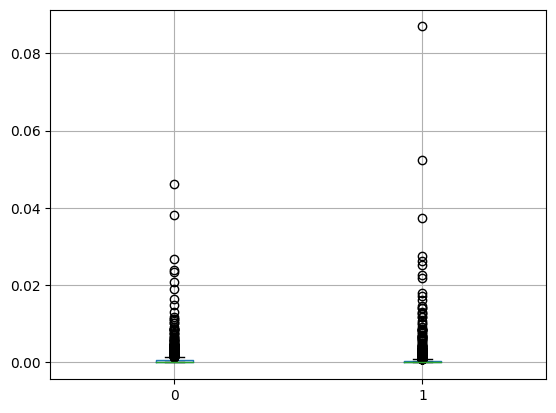

In [8]:
dataset.groupby('label').mean().transpose().boxplot()

As it seems, the distribution of the bacteria whether someone has label 1 or 0 isn't the same on an average basis. Now let's highlight the bacteria for which the distinction is major between the 2 classes.

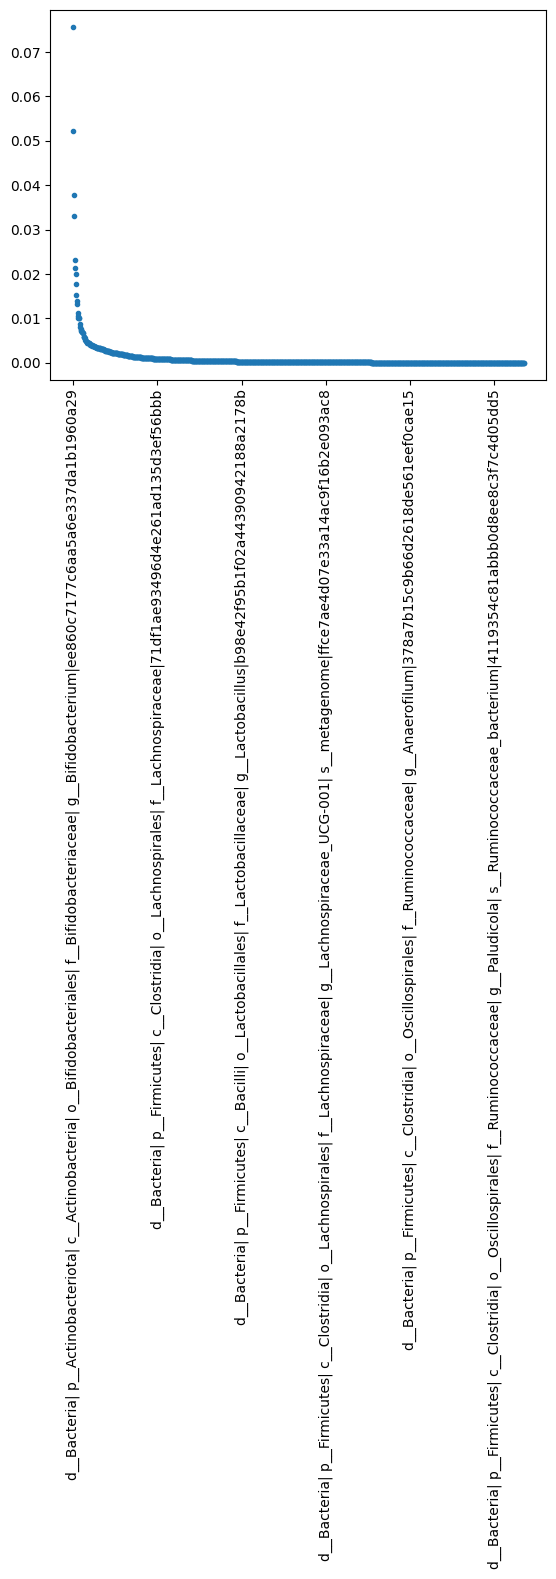

In [9]:
mean_values = dataset.groupby('label').mean()
diff_mean_proportion = (mean_values.iloc[0] - mean_values.iloc[1]).abs()
diff_mean_proportion = diff_mean_proportion.sort_values(ascending=False)

diff_mean_proportion.plot(rot=90, marker='.', linestyle='')
plt.show()

In [10]:
# Print de n most varying on average between label 1 and 0 individuals
diff_mean_proportion.head(5)

d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Bifidobacteriales| f__Bifidobacteriaceae| g__Bifidobacterium|ee860c7177c6aa5a6e337da1b1960a29           0.075682
d__Bacteria| p__Bacteroidota| c__Bacteroidia| o__Bacteroidales| f__Prevotellaceae| g__Prevotella| s__uncultured_Prevotella|707129e81ca73a0f3f364350a26726e7     0.052275
d__Bacteria| p__Bacteroidota| c__Bacteroidia| o__Bacteroidales| f__Bacteroidaceae| g__Bacteroides| s__Bacteroides_dorei|9b4f3f7e600916aa527ba3bd132a4ca6        0.037731
d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae| g__Escherichia-Shigella|7a5478452f84fc37376a3408bc310451    0.033101
d__Bacteria| p__Bacteroidota| c__Bacteroidia| o__Bacteroidales| f__Prevotellaceae| g__Prevotella|e0893ea21d1a8b4edbc5ce6c43527776                               0.023118
dtype: float64

In [11]:
# What proportion of bacteria are not changing much on average at threshold 0.001% ?
diff_mean_proportion[diff_mean_proportion < 0.001].count() / diff_mean_proportion.count()

0.8281979458450047

As we look into the variation in composition of the microbiota of label 1 and 0 individuals, it seems that some bacteria can vary up to 7.5%, which is quite significant. Note though that most of the composition is left almost unchanged (82.8% at threshold 0.001%)

Now, we look into a possible correlation between the microbiota composition and the associated label of the individual.

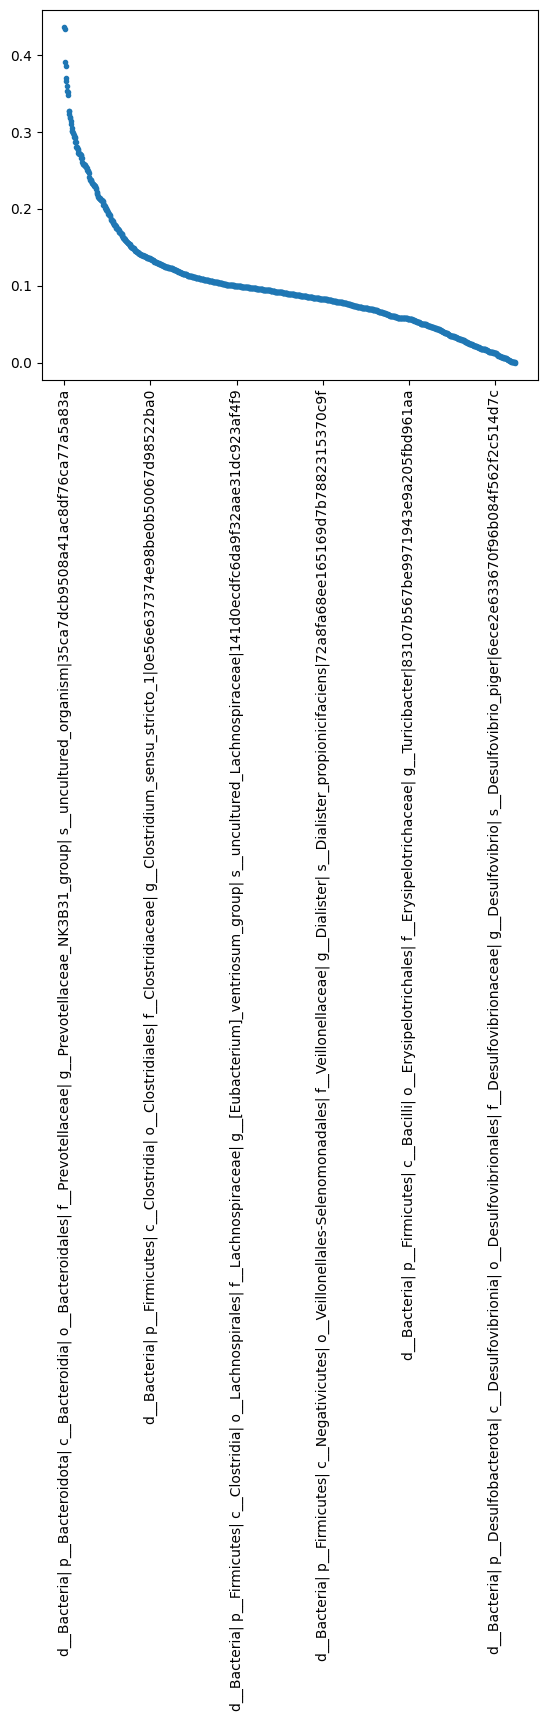

In [12]:
correlation_with_label = dataset.corr()['label'].abs().sort_values(ascending=False)
correlation_with_label = correlation_with_label.drop(correlation_with_label.index[0])
correlation_with_label.plot(rot=90, marker='.', linestyle='')
plt.show()

As it seems, there exists a direct absolute correlation between some bacteria and the associated label. Some seem to be way less impacting than others in the result, but most of them seems to play an informative role.

Looking at the correlation between the different features, we can obtain the following correlation matrix.

In [13]:
X.corr()

,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae| g__Escherichia-Shigella|7a5478452f84fc37376a3408bc310451,d__Bacteria| p__Bacteroidota| c__Bacteroidia| o__Bacteroidales| f__Bacteroidaceae| g__Bacteroides| s__Bacteroides_dorei|9b4f3f7e600916aa527ba3bd132a4ca6,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Bifidobacteriales| f__Bifidobacteriaceae| g__Bifidobacterium|ee860c7177c6aa5a6e337da1b1960a29,d__Bacteria| p__Firmicutes| c__Clostridia| o__Lachnospirales| f__Lachnospiraceae| g__Blautia|7f03b2c8f50e54d015ddf07fa90c95fd,d__Bacteria| p__Bacteroidota| c__Bacteroidia| o__Bacteroidales| f__Bacteroidaceae| g__Bacteroides| s__Bacteroides_vulgatus|159871098ca16ec6d19aea367ffee488,d__Bacteria| p__Bacteroidota| c__Bacteroidia| o__Bacteroidales| f__Bacteroidaceae| g__Bacteroides| s__Bacteroides_vulgatus|82a938698291b68cecfcb9d46457229b,d__Bacteria| p__Firmicutes| c__Bacilli| o__Lactobacillales| f__Streptococcaceae| g__Streptococcus|278f28a185593f1ddf4e891f1ef6d1ac,d__Bacteria| p__Firmicutes| c__Clostridia| o__Lachnospirales| f__Lachnospiraceae| g__Agathobacter| s__[Eubacterium]_rectale|fe8ead2946324fd23605a7e82c52261a,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__Ruminococcaceae| g__Faecalibacterium|689d03e9572c681bb9e11ce09f36e4bb,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__Ruminococcaceae| g__Faecalibacterium|b9072242edca7525f17dfaf07abbb08e,...,d__Bacteria| p__Firmicutes| c__Clostridia| o__Lachnospirales| f__Lachnospiraceae| g__Roseburia| s__gut_metagenome|ba4ec057ff6f175134171c197269f5f5,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__[Eubacterium]_coprostanoligenes_group| g__[Eubacterium]_coprostanoligenes_group| s__unidentified|423d5ccfa43c914c234173f5b7a94822,d__Bacteria| p__Actinobacteriota| c__Coriobacteriia| o__Coriobacteriales| f__Eggerthellaceae| g__Senegalimassilia| s__uncultured_bacterium|1ac643ef39d8ef2e8e4c4edbad3c1208,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__Oscillospiraceae| g__Papillibacter| s__uncultured_bacterium|b76c9718a8ad3db13fb3809460cd78cc,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__Ruminococcaceae| g__Paludicola| s__Ruminococcaceae_bacterium|4119354c81abbb0d8ee8c3f7c4d05dd5,d__Bacteria| p__Firmicutes| c__Clostridia| o__Christensenellales| f__Christensenellaceae| g__Christensenellaceae_R-7_group| s__uncultured_bacterium|36376a562c920d5d13a70317407947cd,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__Ruminococcaceae| g__Candidatus_Soleaferrea| s__uncultured_bacterium|17644a374bd5005fdc248efb8d9af68c,d__Bacteria| p__Firmicutes| c__Clostridia| o__Lachnospirales| f__Lachnospiraceae| g__Tyzzerella| s__unidentified|8fd0bd19ed36582fdecc6e6a3cfbe49e,d__Bacteria| p__Firmicutes| c__Clostridia| o__Lachnospirales| f__Lachnospiraceae| g__Anaerostipes|5d63e2e6e2a476d1515102dd96658eb6,d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__Butyricicoccaceae| g__Butyricicoccus| s__Butyricicoccus_sp.|1b1776b1b0465b7f18481164a523e86a
d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae| g__Escherichia-Shigella|7a5478452f84fc37376a3408bc310451,1.000000,-0.067677,-0.058955,-0.320524,-0.040300,-0.096133,-0.011897,-0.167960,-0.062872,-0.157204,...,0.053503,-0.077442,-0.070449,-0.067909,-0.069632,-0.071553,-0.071113,-0.070008,-0.072883,-0.067068
d__Bacteria| p__Bacteroidota| c__Bacteroidia| o__Bacteroidales| f__Bacteroidaceae| g__Bacteroides| s__Bacteroides_dorei|9b4f3f7e600916aa527ba3bd132a4ca6,-0.067677,1.000000,-0.082539,-0.112713,-0.085498,0.003138,-0.045207,-0.100707,-0.112202,-0.100713,...,-0.056108,-0.061303,-0.038306,-0.041233,-0.045682,-0.037026,-0.026989,-0.042065,-0.059448,0.013940
d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Bifidobacteriales| f__Bifidobacteriaceae| g__Bifidobacterium|ee860c7177c6aa5a6e337da1b1960a29,-0.058955,-0.082539,1.000000,-0.023306,-0.088218,0.01487

## Predictive models

### Logistic regression

Recall that our goal is to predict the label of each individual given their microbiota structure. We perform some rudimentary preprocessing:
- rescaling in $[0,1]$
- standardization
- adding column of 1 for bias

First, we try the simplest model possible: the logistic regression.

In [14]:
# Standardization
# X = (X - X.mean())/X.std()
# Min/Max scaling
# X = (X - X.min())/(X.max() - X.min())
# Adding a constant column for bias
X['constant'] = 1

print(np.isnan(X.values).any())

False


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
# Building training and test sets in a stratified fashion so we keep a similar distribution of labels

stratifier = StratifiedShuffleSplit(n_splits=1, test_size=0.25)
for i, (train_index, test_index) in enumerate(stratifier.split(X, y)):
    continue

X_train, y_train = X.values[train_index], y.values[train_index]
X_test, y_test = X.values[test_index], y.values[test_index]

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix

logistic_reg = LogisticRegression(
    penalty='l2',
)
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)
print("Logistic regression metrics:")
print("Accuracy:", logistic_reg.score(X_test, y_test))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Logistic regression metrics:
Accuracy: 0.7619047619047619
Balanced Accuracy: 0.5
Confusion matrix:
 [[16  0]
 [ 5  0]]


### Latent model with logistic regression

In this section, we aim at potentially improving the previous results by introducing a latent variable model in our logistic regression.

The model is the following:
- $Z_i \sim \mathcal{B}(\pi)$
- $p_{\theta}(X_i | Z_i) \sim \mathcal{N}(\mu, \Sigma)$
- $\mathbb{P}(Y_i = 1 | X_i, Z_i = k) = \sigma(W_{e,k} e_k + W_{x,k} X_i)$

First, we try to determine a relevant space for $Z$.

In [47]:
from sklearn.mixture import GaussianMixture

n_component_list = [1, 2, 3, 5, 10]
bic = np.zeros(len(n_component_list))
aic = np.zeros(len(n_component_list))

X_tild_train = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)
X_tild_test = np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1)
for i, n_component in enumerate(n_component_list):
    gmm = GaussianMixture(n_components=n_component, random_state=0)
    gmm.fit(X_tild_train)
    bic[i] = gmm.bic(X_tild_test)
    aic[i] = gmm.aic(X_tild_test)

C:\Users\frigi\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\frigi\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\frigi\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\frigi\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmea

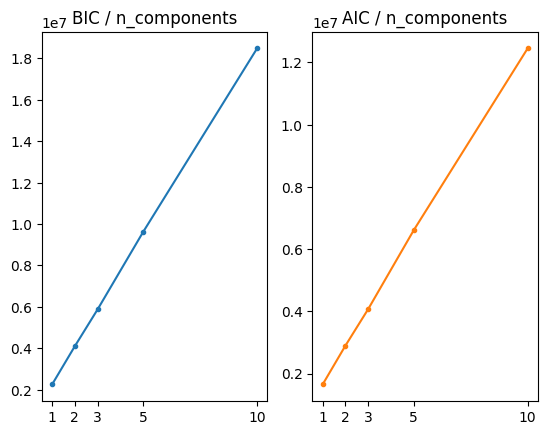

In [48]:
fig, axs = plt.subplots(1, 2)
axs[0].set_title("BIC / n_components")
axs[0].plot(n_component_list, bic, marker='.', color='C0')
axs[1].set_title("AIC / n_components")
axs[1].plot(n_component_list, aic, marker='.', color='C1')
for ax in axs:
    ax.set_xticks(n_component_list)
plt.show()

In [52]:
from src.model import GaussianMixtureClassifier
from src.utils.optimizers import GradientDescent
from src.utils.functions import accuracy

gmm_classif = GaussianMixtureClassifier(
    z_dim=4,
    optimizer=GradientDescent(learning_rate=0.01, n_iter=100),
    seed=0
)
gmm_classif.fit(X_train, y_train)
y_pred = gmm_classif.classify(X_test)
print("Latent Gaussian Mixture Logistic regression metrics:")
print("Accuracy:", accuracy(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM.py:181: RuntimeWarning: divide by zero encountered in log
  probas[c] = np.log(self.pi[c]) + np.log(self.p_cond(x_i, self.mu[c], self.sigma[c]))


Latent Gaussian Mixture Logistic regression metrics:
Accuracy: 0.7619047619047619
Balanced Accuracy: 0.5
Confusion matrix:
 [[16  0]
 [ 5  0]]
